In [79]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
plt.style.reload_library()
plt.style.use(['science', 'grid'])
import ipywidgets as widgets

In [113]:
# DEFINING FITTING FUNCTIONS USED FOR THIS LAB ---------------------------------------
def proportionality(x,a):
    return a*x

def linear(x,a,b):
    return a*x + b

def LinearPlot(xdata,ydata,error,a,b,title,function,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(xdata,*parameters),label = label, color=color)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.title(title, fontsize = 18)
    plt.legend(prop={'size': 15}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")

In [88]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '18aGYPzIeaz31XkQZZwtFpZK-r2aNAOhvqO-KZpPy2dA'
workSheetName = 'PreLab'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df

,I (A),B-high (G),B-low (G),∆B (G),∆B (T),B (G),B (T),x-pos,y-pos,x-pos.1,Magnetic Field B (G),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1.52,13.1,12.7,0.20,0.000020,12.90,0.001290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.65,14.3,13.6,0.35,0.000035,13.95,0.001395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.80,15.8,15.2,0.30,0.000030,15.50,0.001550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.95,17.4,16.8,0.30,0.000030,17.10,0.001710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.10,18.5,17.7,0.40,0.000040,18.10,0.001810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.25,19.9,19.2,0.35,0.000035,19.55,0.001955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.40,20.8,20.0,0.40,0.000040,20.40,0.002040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.55,22.0,21.4,0.30,0.000030,21.70,0.002170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.70,22.9,22.3,0.30,0.000030,22.60,0.002260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.85,24.5,23.6,0.45,0.000045,24.05,0.002405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_error = widgets.Dropdown(options=filenames,
                                description='Error',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x, drop_down_error)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', 'I (A)', 'B-high …

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', 'I (A)', 'B-high …

Dropdown(description='Error', layout=Layout(width='max-content'), options=('Select Column', 'I (A)', 'B-high (…

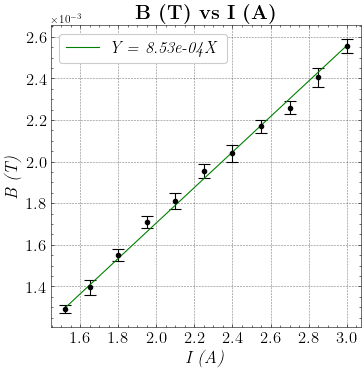

In [115]:
# FITTING THE DATA USING A LINEAR RELATIONSHIP ---------------------------------------
xdata, ydata, error = df[drop_down_x.value], df[drop_down_y.value], df[drop_down_error.value]
parameters, covariance = opt.curve_fit(proportionality, xdata, ydata, sigma = error)
perr = np.sqrt(np.diag(covariance))

#Calculate the error on the fits from the covariacne matrix
slope = parameters[0]
slope_error = perr[0]

if parameters.shape[0] > 1: 
    b = parameters[1] 
    b_error = perr[1]
else:
    b = 0
    b_error = 0

# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{' + drop_down_y.value + ' vs ' + drop_down_x.value + '}$'
LinearPlot(xdata,ydata,error,slope,b,title,proportionality,'green',drop_down_x.value,drop_down_y.value)

In [119]:
print('slope_error = ' + "{:.4e}".format(slope_error))
print('b_error = ' + "{:.4e}".format(b_error))

slope_error = 3.5331e-06
b_error = 0.0000e+00


## HERE STARTS THE LAB DATA TREATMENT ------------------

In [120]:
from scipy.constants import mu_0

In [122]:
# EXPERIMENTAL DETAILS
N = 130 # Number of turns per coil
R_0 = 0.15 # Separation between coils (m)

In [136]:
# DETERMING THE THEORETICAL SLOPE (WITHOUT SIGNIFICANT FIGURES TREATMENT)
units = 'T/A'
A = ((4/5)**(3/2))*(mu_0*N)/R_0
print('Theoretical slope: ' + "{:.4e}".format(A) + ' ' + units)
print('Experimental slope: ' + "{:.4e}".format(slope) + ' ± ' + "{:.4e}".format(slope_error) + ' ' + units)

Theoretical slope: 7.7929e-04 T/A
Experimental slope: 8.5258e-04 ± 3.5331e-06 T/A
